## **AULA 01 - CONHECENDO OS DADOS**

In [ ]:
import pandas as pd

In [ ]:
notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv")
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
notas.shape #linhas e colunas

(100836, 4)

In [ ]:
notas.columns #nome das colunas

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [ ]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"] #modificar o nome
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas["nota"]

In [ ]:
notas['nota'].unique() #Quais notas apareceram

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
notas['nota'].value_counts() #Quantas vezes cada nota apareceu

,count
nota,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


In [ ]:
notas["nota"].mean() #Média das notas

3.501556983616962

<Axes: ylabel='Frequency'>

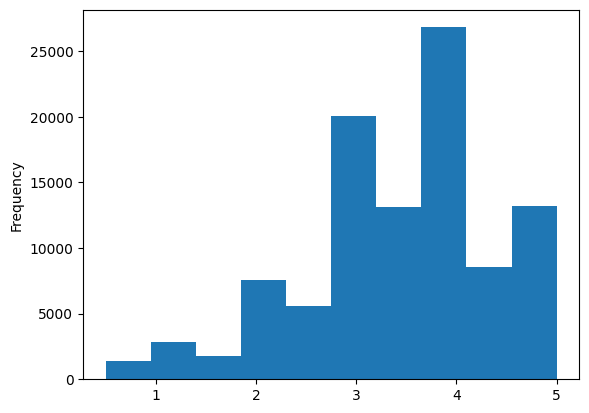

In [ ]:
notas["nota"].plot(kind='hist')
#Grafico de histograma --> Serve para mostrar a frequencia que cada valor aparece

In [ ]:
notas["nota"].median() #Mediana das notas

3.5

In [ ]:
mediana = notas["nota"].median()
media = notas["nota"].mean()
print(f"mediana: {mediana}")
print("media: ", media)

mediana: 3.5
media:  3.501556983616962


In [ ]:
notas["nota"].describe()  #Resumo das estatisticas
#count -> total de valores
#mean -> media
#std -> desvio padrão (É como saber se as notas da turma estão bem próximas da média ou se tem muita diferença entre elas.)
#min: O menor valor do seu conjunto de dados. É como saber qual a menor nota da turma.
#25%: O primeiro quartil, que representa o valor abaixo do qual estão 25% dos seus dados. É como saber qual a nota que separa os 25% alunos com as notas mais baixas da turma.
#50%: A mediana, que divide seus dados ao meio. É como saber qual a nota que separa a metade dos alunos com notas mais baixas da metade com notas mais altas.
#75%: O terceiro quartil, que representa o valor abaixo do qual estão 75% dos seus dados. É como saber qual a nota que separa os 75% alunos com as notas mais baixas da turma.
#max: O maior valor do seu conjunto de dados. É como saber qual a maior nota da turma.

,nota
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


<Axes: ylabel='nota'>

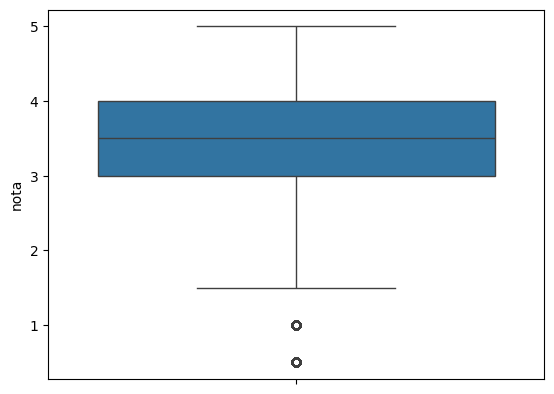

In [ ]:
import seaborn as sns
#Biblioteca para graficos

sns.boxplot(notas["nota"])

## **AULA 02 - ANALISANDO OS DADOS**

In [ ]:
filmes =  pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
#Todas as notas, o Id de quem deu as notas e o moneto em que elas foram dadas
notas.query("filmeId==1")

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [ ]:
#Media de cada coluna(não faz muito sentido)
notas.query("filmeId==1").mean()

,0
usuarioId,3.065302e+02
filmeId,1.000000e+00
nota,3.920930e+00
momento,1.129835e+09


In [ ]:
# Pesquisar a media de apenas as notas do filme com Id 1
notas.query("filmeId==1")["nota"].mean()

3.9209302325581397

In [ ]:
# Pesquisar a media de apenas as notas do filme com Id 2
notas.query("filmeId==2")["nota"].mean()

3.4318181818181817

In [ ]:
#Pesquisar a media das notas de todos os filmes
notas.groupby("filmeId").mean() #Aqui apareceria a media de todas as colunas (usuarioId e momento tbm, oq não faria sentido)

medias_por_id_filme = notas.groupby("filmeId")["nota"].mean()
medias_por_id_filme.head() #aparecer as 5 primeiras apenas
# Agrupou pelo filmeId a media de todas as notas

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


<Axes: ylabel='Frequency'>

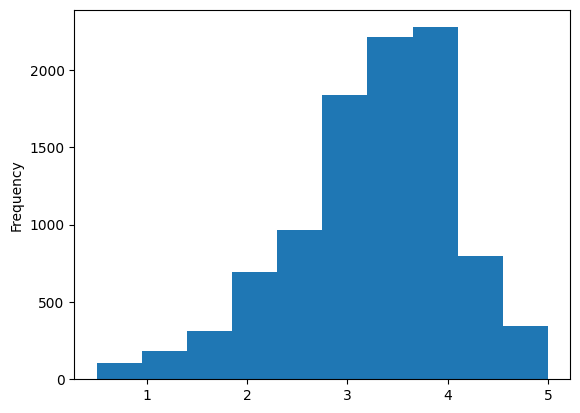

In [ ]:
#GRAFICO DE FREQUENCIA DE NOTA
medias_por_id_filme.plot(kind='hist')

<Axes: ylabel='nota'>

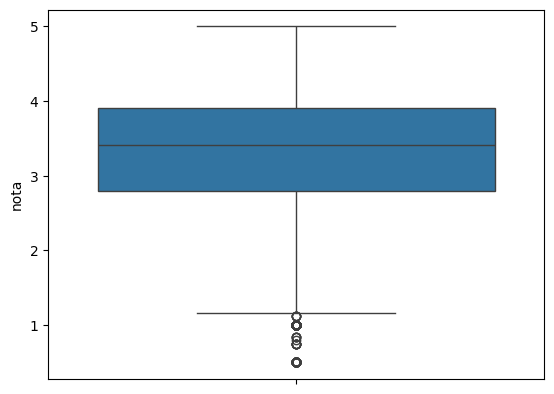

In [ ]:
sns.boxplot(medias_por_id_filme)
#

In [ ]:
medias_por_id_filme.describe()

,nota
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416667
75%,3.911765
max,5.000000


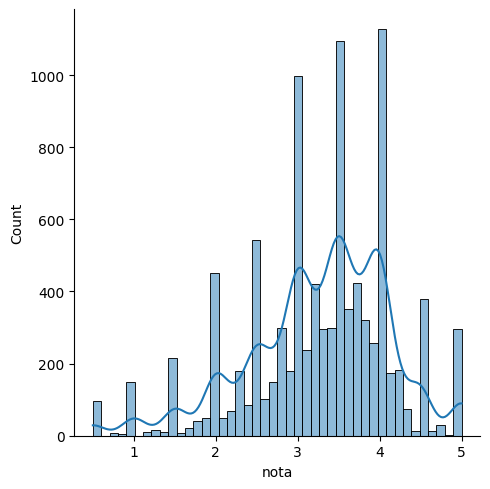

In [ ]:
sns.displot(medias_por_id_filme, kde=True)
#A diferença entre esse e o outro histograma é que esse é mais 'detalhado', ou seja, é mais dividido

Text(0.5, 1.0, 'Histograma das médias de notas dos filmes')

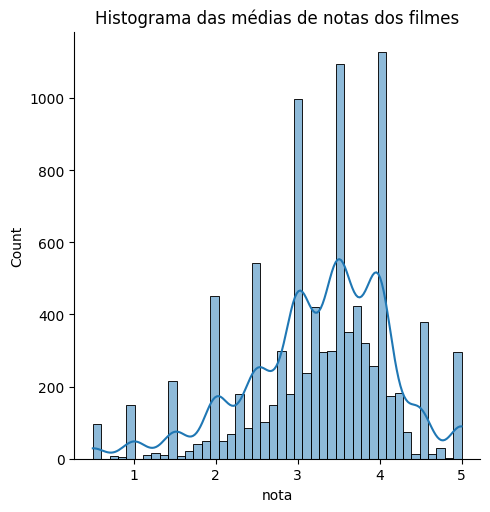

In [ ]:
import matplotlib.pyplot as plt
#Biblioteca para graficos com mais funções, para detalhar mais como se fosse acessorios mas o grafico em si continua igual
sns.displot(medias_por_id_filme, kde=True)
plt.title("Histograma das médias de notas dos filmes")

## **AULA 03 - ENTENDENDO OS TIPOS DE VARIÁVEIS**

In [ ]:
tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


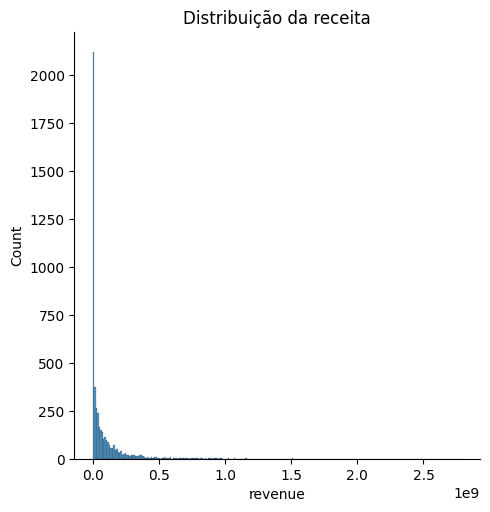

In [ ]:
sns.displot(tmdb['revenue'])
plt.title("Distribuição da receita")
#Poucos filmes fizeram mais de 1 bilhão
plt.show()

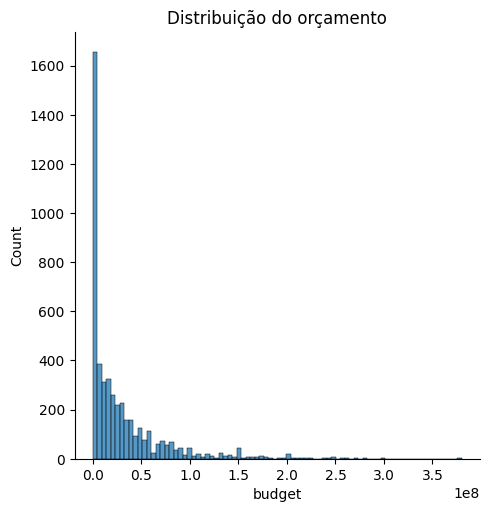

In [ ]:
# prompt: grafico de distribuição do orçamento dos filmes (budget)

sns.displot(tmdb['budget'])
plt.title("Distribuição do orçamento")
plt.show()


In [ ]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [ ]:
tmdb.query("revenue<500")
#Aqui encontramos varios com 0, oq siginifica que não está registrado o qnt gerou
#Para arrumar, excluimos os com 0
com_faturamento_baixo = tmdb.query("revenue>0 and revenue<500")
com_faturamento_baixo


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1562,30,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""...",NaN,16340,"[{""id"": 90, ""name"": ""paris""}, {""id"": 3338, ""na...",it,Rugrats in Paris: The Movie,The Rugrats are back! There's Tommy the brave ...,4.590277,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2000-09-14,103,78.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Ooo la la! Paris will never be the same!,Rugrats in Paris: The Movie,6.0,100
1655,23000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,14844,"[{""id"": 110, ""name"": ""venice""}, {""id"": 220, ""n...",en,Chasing Liberty,"The President's daughter, unable to experience...",3.362045,"[{""name"": ""Alcon Entertainment"", ""id"": 1088}, ...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2004-01-09,12,111.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,How do you fall in love with the whole world w...,Chasing Liberty,6.1,152
1771,28,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",NaN,1613,"[{""id"": 852, ""name"": ""chemical""}, {""id"": 21540...",en,The 51st State,Elmo McElroy is a streetwise American master c...,9.670031,"[{""name"": ""Film Council"", ""id"": 246}, {""name"":...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2001-12-07,14,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Nice Wheels. Dirty Deals. And One Mean Mother ...,The 51st State,5.9,173
1912,25,"[{""id"": 18, ""name"": ""Drama""}]",NaN,10397,"[{""id"": 1625, ""name"": ""emigration""}, {""id"": 18...",en,Angela's Ashes,Based on the best selling autobiography by Iri...,4.887940,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""IE"", ""name"": ""Ireland""}, {""is...",1999-12-25,13,145.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Angela's Ashes,7.0,59
2068,9000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.deathatafuneral-themovie.com/,2196,"[{""id"": 380, ""name"": ""brother brother relation...",en,Death at a Funeral,Chaos ensues when a man tries to expose a dark...,20.410354,"[{""name"": ""Sidney Kimmel Entertainment"", ""id"":...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2007-02-09,46,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,From director Frank Oz comes the story of a fa...,Death at a Funeral,6.9,497
2485,16000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,18475,"[{""id"": 10267, ""name"": ""comedy""}]",en,The Cookout,When Todd Anderson signs a $30 million deal wi...,0.830596,"[{""name"": ""Cookout Productions"", ""id"": 3494}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-09-03,12,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"This summer, get your grill on!",The Cookout,4.6,10
2806,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,11658,"[{""id"": 41586, ""name"": ""archaeologist""}, {""id""...",ko,태극기 휘날리며,"In 1950, in South Korea, shoe-shiner Jin-tae L...",9.572705,"[{""name"": ""Showbox Entertainment"", ""id"": 11420}]","[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",2004-02-05,15,140.0,"[{""iso_639_1"": ""ko"", ""name"": ""\ud55c\uad6d\uc5...",Released,NaN,Tae Guk Gi: The Brotherhood of War,7.4,133
2848,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,26710,"[{""id"": 17985, ""name"": ""birth""}, {""id"": 160946...",en,My Baby's Daddy,A trio of young men are forced to grow up quic...,4.480167,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-01-09,51,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Baby's Daddy,4.3,15
2874,12000000,"[{""id"": 9648, ""name"": ""Mystery""}, {"

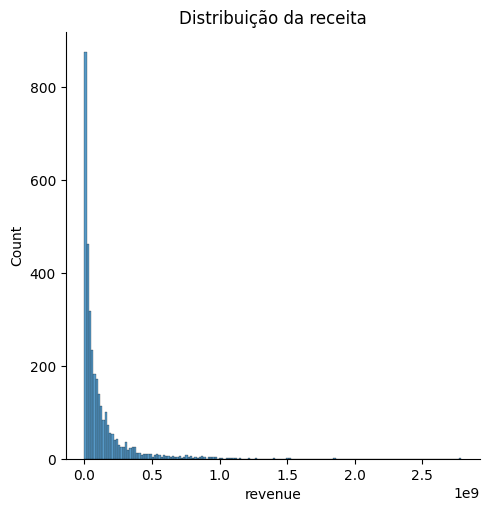

In [ ]:
#Grafico agora sem o 0, ou seja, sem aquels que não foram registrados
com_faturamento = tmdb.query("revenue>0")
sns.displot(com_faturamento['revenue'])
plt.title("Distribuição da receita")
plt.show()#para tirar o texto qeu aparece em cima

In [ ]:
tmdb["original_language"].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
#Para saber qual mais apareceu
tmdb["original_language"].value_counts()

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


In [ ]:
#Tipos de variavéis

#Variáveis Numéricas:

# Quantitativas continuas -> Essas variáveis podem assumir qualquer valor dentro de um intervalo. Imagine a temperatura: ela pode ser 25 graus, 25.5 graus, 25.75 graus... O orçamento de um filme também é um exemplo, pois pode ser R$ 10.000, R$ 10.500, R$ 10.750...
#     exemplo -> Altura de uma pessoa: Pode ser 1,65m, 1,70m, 1,72m... / Tempo de duração de um filme: Pode ser 1h30min, 2h, 2h15min...

# Quantitativas discretas (não pode ter fracionada) -> ssas variáveis só podem assumir valores inteiros, ou seja, não podem ter valores fracionados. Pense na quantidade de votos em um filme: você pode ter 1 voto, 2 votos, 3 votos... mas não pode ter 2.5 votos, certo?
#      exemplo -> Número de filhos de uma família: Pode ser 0, 1, 2, 3... / Número de carros em uma garagem: Pode ser 1, 2, 3...


# Variáveis Categóricas:

# Qualitativas nominais (sem ordem)-> Essas variáveis representam categorias sem ordem. A língua original de um filme é um exemplo: "inglês", "espanhol", "japonês"... Não existe uma ordem natural entre essas línguas.
#        exemplo -> Cor dos olhos: Azul, verde, castanho, preto... / Marca de carro: Fiat, Volkswagen, Chevrolet...

# Qualitativas ordinal (com ordem)-> Essas variáveis representam categorias com ordem. A nota de um filme é um bom exemplo: "1 estrela", "2 estrelas", "3 estrelas"... Existe uma ordem natural entre as categorias, do pior para o melhor.
 #       exemplo -> Nível de escolaridade: Fundamental, Médio, Superior... / Classificação de um filme: Ruim, Regular, Bom, Ótimo...

# **AULA 04 - VISUALIZANDO OS DADOS**

In [ ]:
tmdb["original_language"].value_counts()

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


In [ ]:
tmdb["original_language"].value_counts().index #Mostra apenas os indices

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language')

In [ ]:
tmdb["original_language"].value_counts().values #Mostra apenas os valores

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [ ]:
contagem_de_lingua= tmdb["original_language"].value_counts().to_frame().reset_index()
#To_frame = transformar em uma tabela de verdade
#Reset_index = Arrumar os indices
contagem_de_lingua.columns = ["original_language", "total"]
#Arrumar os nomes da coluna
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

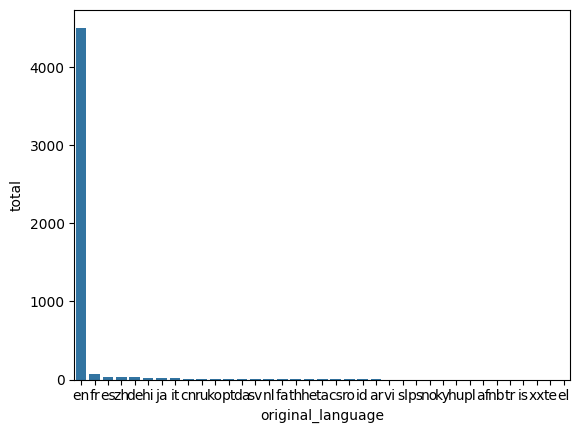

In [ ]:
#Transformando em grafico de barra (BarPlot) - se fosse em grafico de linha seria .plot
sns.barplot(data=contagem_de_lingua, x="original_language", y="total")

<Axes: >

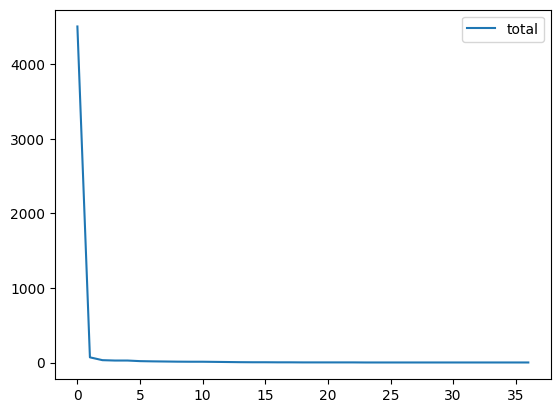

In [ ]:
contagem_de_lingua.plot()

<Axes: xlabel='original_language', ylabel='count'>

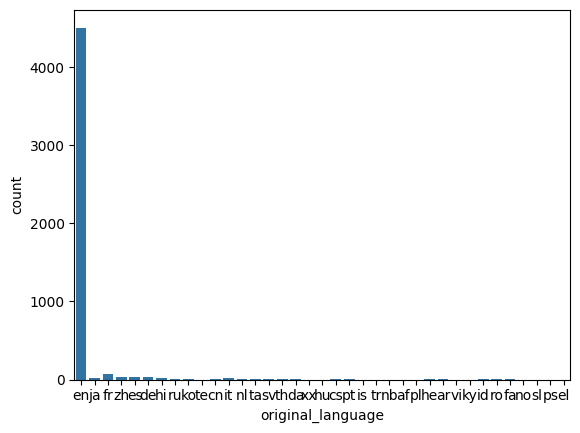

In [ ]:
# Garficos para dados categoricos
sns.countplot(data=tmdb, x="original_language")

<Axes: ylabel='total'>

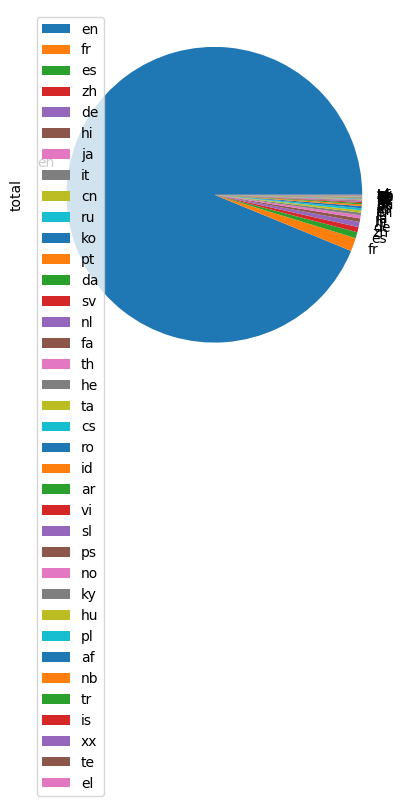

In [ ]:
# grafico de pizza
contagem_de_lingua.plot(kind="pie", y="total", labels=contagem_de_lingua["original_language"])
#Graficos d epizza não existem no sns, ent é usado na biblioteca pandas msm com o .plot
#kind = pie, denomina o tipo do grafico
#grafico de pizza é pouco usado para comparar!!

In [ ]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_ingles = total_por_lingua.loc["en"] #loc = localizar

#duas maneiras de encontrar o resto sem o "en"
total_resto = total_geral - total_ingles

total_outros = total_por_lingua.drop(["en"]).sum()

print(f"Total geral: {total_geral} \ntotal Ingles(en): {total_ingles}\ntotal resto: {total_resto} e {total_outros}" )
#

Total geral: 4803 
total Ingles(en): 4505
total resto: 298 e 298


In [ ]:
#Criando uma tabelo(dataFrame) para mostrar a diferenca entre o "en" e todo o resto

#Dicionario em py
dados = {
    "lingua": ["ingles", "outros"], #Coluna X
    "total": [total_ingles, total_outros] #Coluna Y
}
dados_por_lingua = pd.DataFrame(dados)
dados_por_lingua

,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

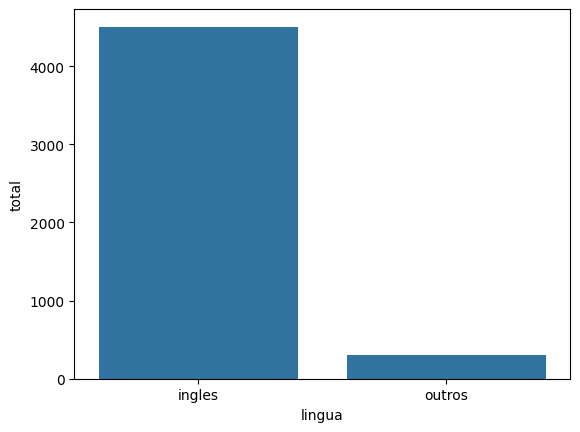

In [ ]:
#Criando gráfico de barra com a tabela usando o sns
sns.barplot(data=dados_por_lingua, x="lingua", y="total")

<Axes: xlabel='lingua'>

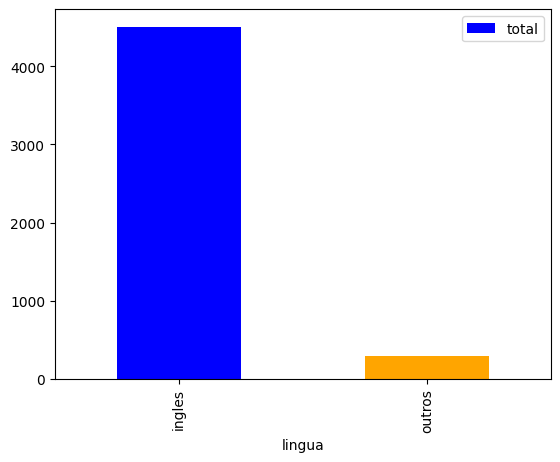

In [ ]:
#Usandando a biblioteca pandas para fzr o grafico

dados_por_lingua.plot(kind='bar', x='lingua', y='total', color=['blue', 'orange'])

<Axes: ylabel='total'>

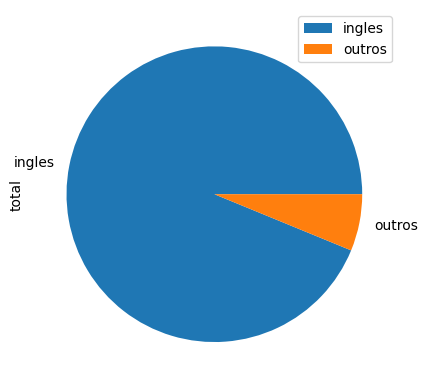

In [ ]:
#Grafico de pizza
dados_por_lingua.plot(kind="pie", y="total", labels=dados_por_lingua["lingua"])

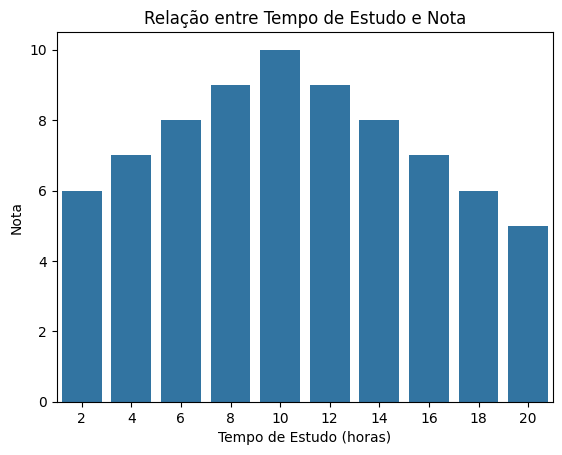

In [ ]:
#Exemplo que fiz de estudos
dadosTeste = {
    'Tempo de Estudo (horas)': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'Nota2': [6, 7, 8, 9, 10, 9, 8, 7, 6, 5]
}

df = pd.DataFrame(dadosTeste)

# Criando o gráfico de barra com Seaborn
sns.barplot(x='Tempo de Estudo (horas)', y='Nota2', data=df)
plt.title('Relação entre Tempo de Estudo e Nota')
plt.xlabel('Tempo de Estudo (horas)')
plt.ylabel('Nota')
plt.show()

In [ ]:
#Loc é feito para localizar e query é para procurar e filtar

#Tabela que mostra a quantidade de filmes por libgua mas excluindo o "en"
total_de_filmes_por_lingua_sem_en =tmdb.query("original_language != 'en'")["original_language"].value_counts()
total_de_filmes_por_lingua_sem_en.head()

,count
original_language,
fr,70
es,32
zh,27
de,27
hi,19


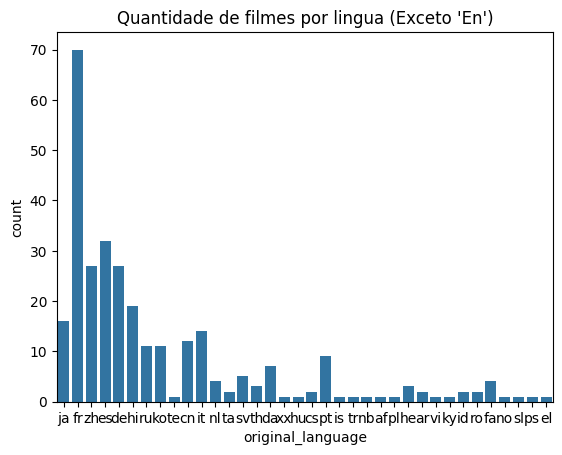

In [ ]:
dados_filmes_ex = tmdb.query("original_language != 'en'")

#Graficos mostrando as outras linguas por filme
sns.countplot(data=dados_filmes_ex, x="original_language")
plt.title("Quantidade de filmes por lingua (Exceto 'En')")
plt.show()


In [ ]:
#Resumo

#Com os dados do TMDB já importados,
#faremos uma avaliação de quantos idiomas existem em nosso arquivo .csv,
#primeiro efetuando a contagem dos valores e índices.

index_nomes_linguas = tmdb["original_language"].value_counts().index
freq_linguas_qntd = tmdb["original_language"].value_counts().values

print(f"Linguas: {index_nomes_linguas}\n")
print(f"Frequencia :{freq_linguas_qntd}")
print("\n#############################################\n")


#Contagem da frequencia de cada lingua / Tranformando em dataFrame / Formando novo indice
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
#Arrumando nome das colunas
contagem_de_lingua.columns = ["original_language", "total"]
print("Tabela\n", contagem_de_lingua.head())

print("\n#############################################\n")




Linguas: Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language')

Frequencia :[4505   70   32   27   27   19   16   14   12   11   11    9    7    5
    4    4    3    3    2    2    2    2    2    1    1    1    1    1
    1    1    1    1    1    1    1    1    1]

#############################################

Tabela
   original_language  total
0                en   4505
1                fr     70
2                es     32
3                zh     27
4                de     27

#############################################



<Axes: xlabel='original_language', ylabel='count'>

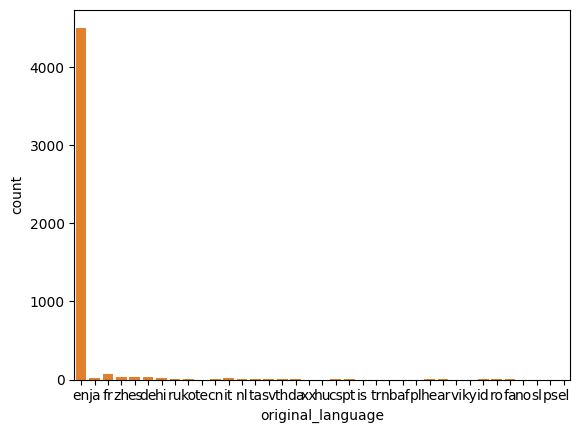

In [ ]:
#Graficos de barras de duas formas diferentes
#countplot é mais fácil para variaveis categoricas
#nabrplot tem que fzr todo esse processo anterior para formatar certinho

sns.countplot(data=tmdb, x="original_language")

sns.barplot(x="original_language", y = "total", data = contagem_de_lingua)

# **AUL 05 - AJUSTANDO OS VISUAIS**

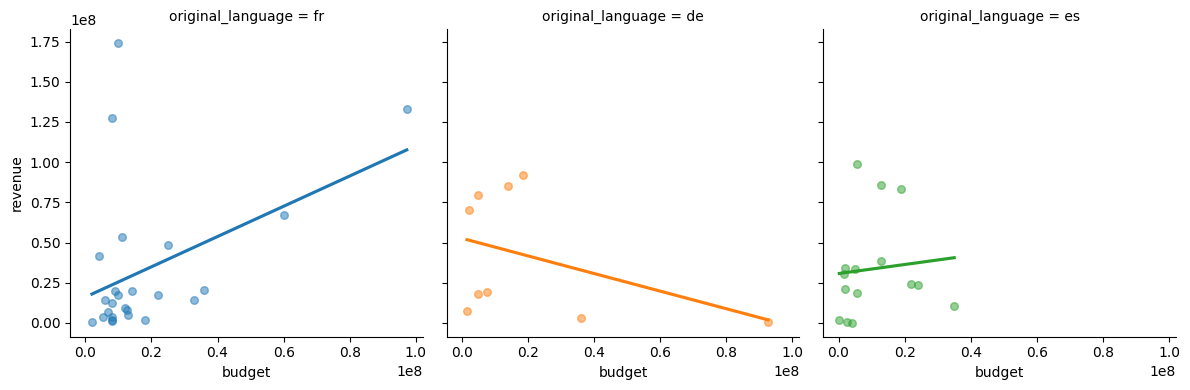

In [ ]:
#Logo abaixo, utilizamos a base do TMDB, que exploramos durante a aula,
#e filtramos os filmes nas línguas francesa, espanhola e alemã
#com valores válidos de receita (revenue) e orçamento (budget).
#Em sequência, criamos 3 gráficos de dispersão com retas de regressão linear (lmplot()) para cada língua:

# Filtrando os dados para as colunas desejadas
dados = tmdb[["title", "original_language", "budget", "revenue"]] #Escolhendo apenas as colunas desejadas
linguas = ["fr", "es", "de"] #fznd dicionarios com as linguas desejadas

# Mantendo dados com valores de receita e orçamento válidos e nas línguas desejadas (fr, es, de)
fr_es_de_com_revenue_e_budget = dados.query("revenue > 0 and budget > 0 and original_language == @linguas")

#construindo o gráfico de dispersão mais a reta de regressão linear para cada caso
#para visualizar a relação entre revenue e budget
#obs: revenue: dinheiro que entrou /budget: orçamento
sns.lmplot(data=fr_es_de_com_revenue_e_budget, x="budget", y="revenue", col="original_language",
           hue="original_language", ci=None, height=4, scatter_kws={"s": 30, "alpha": 0.5})

#hue="original_language": definindo a cor dos pontos de acordo com a língua do filme.
#col="original_language": Ela indica que queremos criar um gráfico separado para cada língua presente na coluna "original_language"
#ci=None: Essa parte desabilita o intervalo de confiança da reta de regressão.
#scatter_kws={"s": 30, "alpha": 0.5}: ajustando o tamanho e a transparência dos pontos do gráfico.
#height=4: Define a altura do gráfico em polegadas.

#Sobre o ci, se estivesse habilitado
#Se a faixa for estreita, significa que a reta de regressão é mais precisa e a relação entre orçamento e receita é mais clara.
#Se a faixa for larga, significa que a reta de regressão é menos precisa e a relação entre orçamento e receita é menos clara.

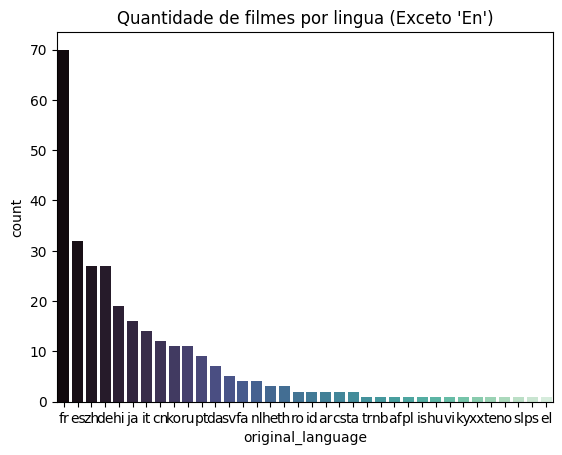

In [ ]:
#AJUSTANDO VISUAL
#Grafico de Quantidade de filmes por lingua (Exceto 'En')
sns.color_palette("mako") #Definindo a paleta de cores

sns.countplot(data=dados_filmes_ex,
              x="original_language",
              palette = "mako", # Paleta de cores
              hue="original_language", #Tonalidade de acordo com a original_language
              hue_order = total_de_filmes_por_lingua_sem_en.index, #ordem das cores(mais forte para o mais fraco)
              order=total_de_filmes_por_lingua_sem_en.index) #ordem baseadas no index da tabela (estava em ordem pelo value.counts())
plt.title("Quantidade de filmes por lingua (Exceto 'En')")
plt.show()

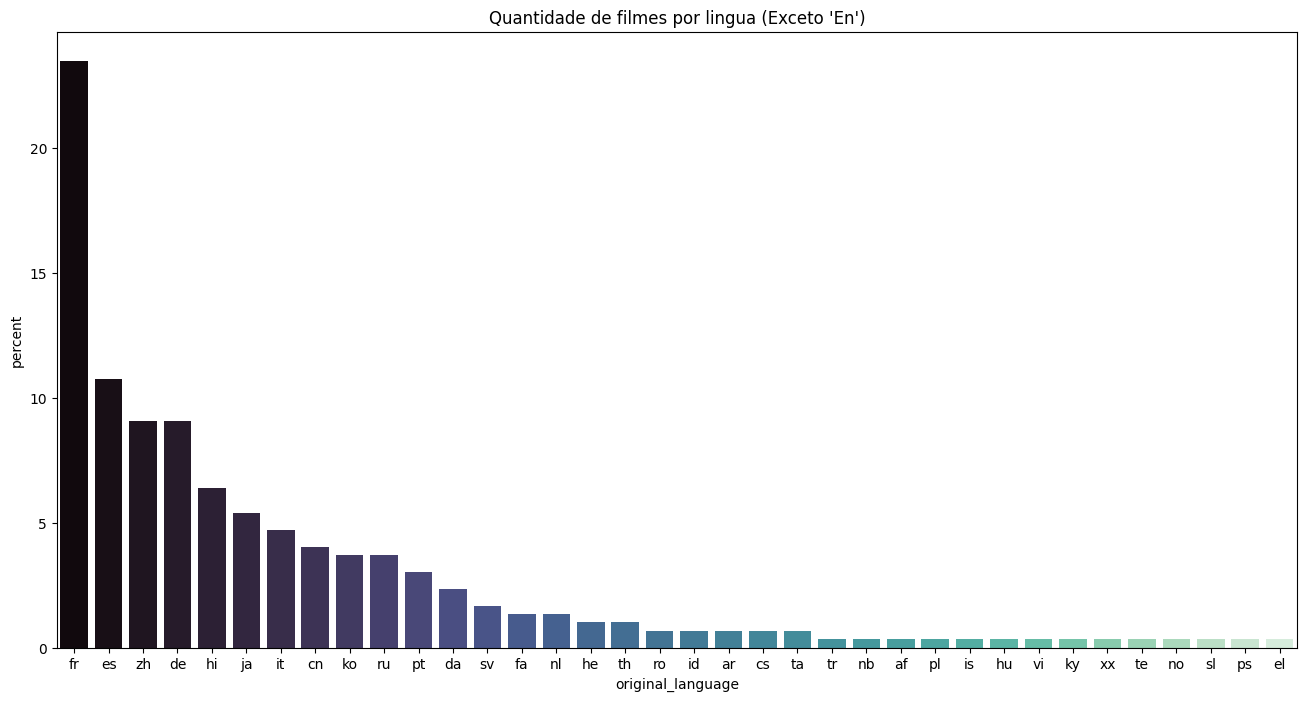

In [ ]:
#Mudando a stat de count para porcentagem

#normalize value_count aparece em porcentagem
tmdb.query("original_language != 'en'")["original_language"].value_counts(normalize=True)

#Mudando no gráfico
plt.figure(figsize=(16,8))#Tamanho horizontal por vertical (lado x altura)
sns.countplot(data=tmdb.query("original_language != 'en'"),
              x="original_language",
              palette = "mako", # Paleta de cores
              stat = "percent", #Mudando para porcentagem

              hue="original_language", #Tonalidade de acordo com a original_language
              hue_order = total_de_filmes_por_lingua_sem_en.index, #ordem das cores(mais forte para o mais fraco)
              order=total_de_filmes_por_lingua_sem_en.index) #ordem baseadas no index da tabela (estava em ordem pelo value.counts())
plt.title("Quantidade de filmes por lingua (Exceto 'En')")
plt.show()

# **AULA 06 - ESTATÍSTICAS DOS DADOS**

In [ ]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
notas_toy_story = notas.query("filmeId==1")['nota']
notas_jumanji = notas.query("filmeId==2")['nota']

media_toy_story = notas_toy_story.mean()
media_jumanji = notas_jumanji.mean()

print(f"Media Toy Story: {media_toy_story}\nMedia Jumanji: {media_jumanji}")

Media Toy Story: 3.9209302325581397
Media Jumanji: 3.4318181818181817


In [ ]:

mediana_toy_story = notas_toy_story.median()
mediana_jumanji = notas_jumanji.median()

print(f"Mediana Toy Story: {mediana_toy_story}\nMediana Jumanji: {mediana_jumanji}")


Mediana Toy Story: 4.0
Mediana Jumanji: 3.5


In [ ]:
import numpy as np

filme1 = [2.5] * 10 + [3.5] * 10
np.mean (filme1)

filme2 = [5] * 10 + [1] * 10
np.mean (filme2)

3.0

In [ ]:
media_filme1 = np.mean (filme1)
mediana_filme1 = np.median (filme1)

media_filme2 = np.mean (filme2)
mediana_filme2 = np.median (filme2)

print("Filme 1:")
print("Média:", media_filme1)
print("Mediana:", mediana_filme1)

print("\nFilme 2:")
print("Média:", media_filme2)
print("Mediana:", mediana_filme2)

Filme 1:
Média: 3.0
Mediana: 3.0

Filme 2:
Média: 3.0
Mediana: 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

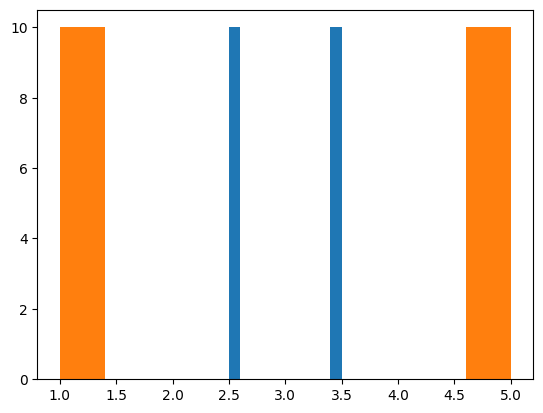

In [ ]:
plt.hist(filme1)
plt.hist(filme2)


{'whiskers': [<matplotlib.lines.Line2D at 0x7faefbfaa860>,
 'caps': [<matplotlib.lines.Line2D at 0x7faefbfaafe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faefbfa9ae0>,
 'medians': [<matplotlib.lines.Line2D at 0x7faefbfa8fa0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7faefbfaba90>,
 'means': []}

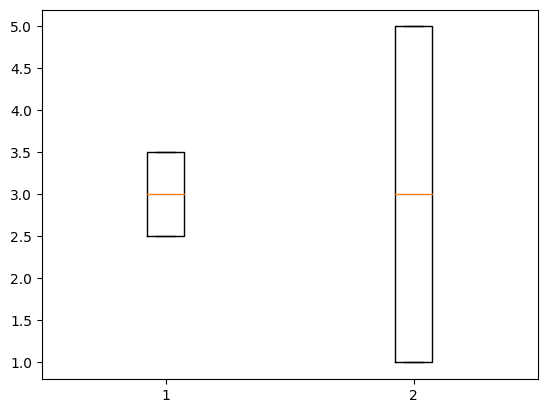

In [ ]:
plt.boxplot([filme1, filme2])

#Com os graficos conseguimos entender que o apesar de terem a msm media, a distribuição dos filmes são diferentes
#Filme 1 - espelha um pouco - desvio pequeno em relação a media
#Filme 2 - espelha muito - desvio alto em realão a media

In [ ]:
#DEsvio padrão é quanto o lemnto desviou da media geral
#Por exemplo notas [2,3,4,4,5,6,7,9]
#A media das notas por exemplo é 5
#Ent o "2" desviou 3, o "3" desviou 2, o "4" desviou 1, o "5" nn teve desvio, o "6" desviou 1, o "7" desviou 2, e o "9" desviou "4"

In [ ]:
#Copiando os exemplos noavmente
filme0 = [3.0]* 20 #espalhamento 0
filme1 = [2.5] * 10 + [3.5] * 10 #espelahamento baixo
filme2 = [5] * 10 + [1] * 10 #espalhamento muito




In [ ]:
np.std(filme0), np.std(filme1), np.std(filme2)




(0.0, 0.5, 2.0)

In [ ]:
#Exemplo geral -  quantidade de visitas em um website por dia da semana em duas semanas:

# Criando DataFrame de exemplo

dados = np.array([[100, 120, 90, 110, 130], [80, 150, 70, 140, 60]])

df = pd.DataFrame(dados, index = ["Semana 1", "Semana 2"],
                  columns= ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"])

# Calculando o desvio padrão das visitas por semana
desvio_padrao_semana1 = df.loc["Semana 1"].std()
desvio_padrao_semana2 = df.loc["Semana 2"].std()

print(df)
print("\nDesvio Padrão da Semana 1:", desvio_padrao_semana1.round(2))
print("Desvio Padrão da Semana 2:", desvio_padrao_semana2.round(2))

          Segunda  Terça  Quarta  Quinta  Sexta
Semana 1      100    120      90     110    130
Semana 2       80    150      70     140     60

Desvio Padrão da Semana 1: 15.81
Desvio Padrão da Semana 2: 41.83


{'whiskers': [<matplotlib.lines.Line2D at 0x7faefbe55780>,
 'caps': [<matplotlib.lines.Line2D at 0x7faefbe55ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faefbe547c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7faefbc7d030>,
 'fliers': [<matplotlib.lines.Line2D at 0x7faefbc7c9d0>,
 'means': []}

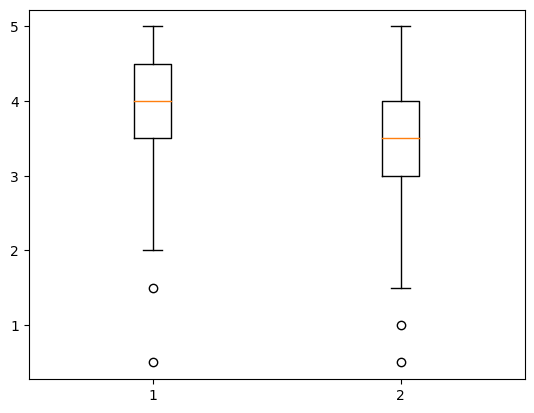

In [ ]:
#FILMES TOY STORY E JAMANJI
notas_toy_story = notas.query("filmeId==1")['nota']
notas_jumanji = notas.query("filmeId==2")['nota']

plt.boxplot([notas_toy_story, notas_jumanji])


<ipython-input-88-357a8d0ce95d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=notas.query("filmeId in [1,2]"), x="filmeId", y="nota", palette="Set2")


<Axes: xlabel='filmeId', ylabel='nota'>

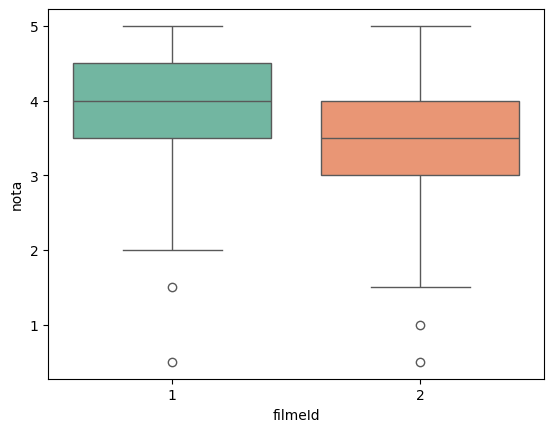

In [ ]:
sns.boxplot(data=notas.query("filmeId in [1,2]"), x="filmeId", y="nota", palette="Set2")
#

In [ ]:
#desafio - encontrar algum filme que só tenha media nota 5

#Contar qqnts vezes aparece
notas.groupby("filmeId").count()

#Poderia ter sido desejeito rbm:
notas['filmeId'].value_counts()

#Precisamos buscar os filmes que aparecem uma vez só

,count
filmeId,
356,329
318,317
296,307
593,279
2571,278
...,...
86279,1
86922,1
5962,1


In [ ]:
notas.groupby("filmeId").count().query("nota==1") #obs: isso vai fzr aparecer os filmes cim apenas uma nota, e mn com nota=1

,usuarioId,nota,momento
filmeId,,,
49,1,1,1
55,1,1,1
77,1,1,1
83,1,1,1
96,1,1,1
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


In [ ]:
notas.groupby("filmeId").count().query("nota==1").index


Index([    49,     55,     77,     83,     96,    106,    108,    117,    128,
          129,
       ...
       193565, 193567, 193571, 193573, 193579, 193581, 193583, 193585, 193587,
       193609],
      dtype='int64', name='filmeId', length=3446)

In [ ]:
# prompt: Como faço com o codigo acima achar as agora aqueles que tenham recebuido só uma nota e ela seja 5

notas.groupby("filmeId").mean().query("nota==5") #Agrupando por filmeId e vendo a media das notas, e filtrando apenas aqueles com media 5
notas.groupby("filmeId").mean().query("nota==5").index #Mostrando apenas os indices

notas.query("filmeId in [187593, 187595, 187717, 193565, 193571, 193573, 193579, 193581, 193583, 193585, 193587, 193609]") #Mostrando as notas dos filmes com media 5
notas.query("filmeId in [187593, 187595, 187717, 193565, 193571, 193573, 193579, 193581, 193583, 193585, 193587, 193609]").groupby("filmeId").count().query("nota==1") #Confirmando que cada filme teve apenas uma nota


,usuarioId,nota,momento
filmeId,,,
187717,1,1,1
193565,1,1,1
193571,1,1,1
193573,1,1,1
193579,1,1,1
193581,1,1,1
193583,1,1,1
193585,1,1,1
193587,1,1,1
